In [20]:
from qwak.State import State
from qwak.Operator import Operator
from qwak.QuantumWalk import QuantumWalk
from qwak.ProbabilityDistribution import ProbabilityDistribution
from qwak.qwak import QWAK


In [3]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import timeit
import sympy as sp
from sympy.abc import pi
from math import sqrt, ceil, pow

Start by creating your initial state:

In [19]:
n = 100
initNodes = [51]

initState = State(n,initNodes)
initState.buildState()
print(initState.getStateVec())

[[0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [1.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]]

Note that this creates a state that is the uniform superposition of the nodes in the initNodes list.

Alternatively, you can create a state with custom amplitudes.

In [8]:
graph = nx.cycle_graph(n)

operator = Operator(graph)
operator.buildDiagonalOperator(20)
print(operator.getOperator())

[[ 7.36689058e-03+1.62378977e-15j  1.13613756e-15-1.26038318e-01j
   1.06497468e-03+9.44278239e-16j ...  2.29744542e-16-1.26144816e-01j
   1.06497468e-03+9.53485837e-16j  1.12549641e-15-1.26038318e-01j]
 [ 1.13486279e-15-1.26038318e-01j  7.36689058e-03+1.61333396e-15j
   1.80072120e-16-1.26038318e-01j ... -1.78567476e-02+1.36873795e-15j
   1.21124883e-15-1.26144816e-01j  1.06497468e-03+1.08791334e-15j]
 [ 1.06497468e-03+9.62686653e-16j  1.80478396e-16-1.26038318e-01j
   7.36689058e-03+8.07061612e-16j ...  1.04176860e-15-1.22573466e-01j
  -1.78567476e-02+1.51189332e-15j  1.22801857e-15-1.26144816e-01j]
 ...
 [ 2.25867690e-16-1.26144816e-01j -1.78567476e-02+1.38868727e-15j
   1.03789288e-15-1.22573466e-01j ...  7.36689058e-03-2.61034759e-16j
   2.47609934e-16-1.26038318e-01j  1.06497468e-03+1.33815431e-16j]
 [ 1.06497468e-03+9.55574287e-16j  1.21125109e-15-1.26144816e-01j
  -1.78567476e-02+1.52332894e-15j ...  2.39805939e-16-1.26038318e-01j
   7.36689058e-03+8.36912420e-16j  1.90133517e-

In [11]:
quantumWalk = QuantumWalk(initState,operator)
quantumWalk.buildWalk()
print(quantumWalk)

[[-0.00096428-0.00074272j]
 [-0.00096428-0.00074272j]
 [ 0.00201197-0.00074272j]
 [ 0.00201197+0.00354742j]
 [-0.0065682 +0.00354742j]
 [-0.0065682 -0.01145213j]
 [ 0.01924511-0.01145213j]
 [ 0.01924511+0.03086787j]
 [-0.04712866+0.03086787j]
 [-0.04712866-0.0680992j ]
 [ 0.0924759 -0.0680992j ]
 [ 0.0924759 +0.11685215j]
 [-0.13538596+0.11685215j]
 [-0.13538596-0.14038111j]
 [ 0.12431912-0.14038111j]
 [ 0.12431912+0.08339329j]
 [-0.02161915+0.08339329j]
 [-0.02161915+0.04664074j]
 [-0.09857637+0.04664074j]
 [-0.09857637-0.11108145j]
 [ 0.07359988-0.11108145j]
 [ 0.07359988-0.00068163j]
 [ 0.07458825-0.00068163j]
 [ 0.07458825+0.10374191j]
 [-0.06546334+0.10374191j]
 [-0.06546334+0.01863958j]
 [-0.08876281+0.01863958j]
 [-0.08876281-0.08787579j]
 [ 0.01229435-0.08787579j]
 [ 0.01229435-0.074352j  ]
 [ 0.09036396-0.074352j  ]
 [ 0.09036396+0.01601195j]
 [ 0.0751526 +0.01601195j]
 [ 0.0751526 +0.08364929j]
 [ 0.0040507 +0.08364929j]
 [ 0.0040507 +0.08688985j]
 [-0.06111669+0.08688985j]
 

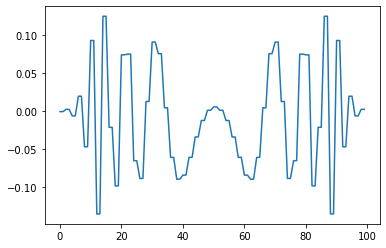

In [14]:
finalState = quantumWalk.getFinalState()
plt.plot(finalState.getStateVec())

In [15]:
probDist = ProbabilityDistribution(finalState)
probDist.buildProbDist()
print(probDist)

[[1.48148004e-06]
 [1.48148004e-06]
 [4.59965579e-06]
 [1.66322030e-05]
 [5.57254694e-05]
 [1.74292559e-04]
 [5.01525499e-04]
 [1.32319977e-03]
 [3.17393643e-03]
 [6.85861125e-03]
 [1.31892930e-02]
 [2.22062171e-02]
 [3.19837822e-02]
 [3.80362136e-02]
 [3.51620987e-02]
 [2.24096842e-02]
 [7.42182892e-03]
 [2.64274633e-03]
 [1.18926597e-02]
 [2.20563902e-02]
 [1.77560317e-02]
 [5.41740709e-03]
 [5.56387121e-03]
 [1.63257913e-02]
 [1.50478332e-02]
 [4.63288227e-03]
 [8.22626968e-03]
 [1.56009908e-02]
 [7.87330602e-03]
 [5.67937144e-03]
 [1.36938650e-02]
 [8.42202741e-03]
 [5.90429602e-03]
 [1.26451178e-02]
 [7.01361267e-03]
 [7.56625500e-03]
 [1.12850968e-02]
 [5.68078066e-03]
 [1.00072365e-02]
 [8.15704204e-03]
 [7.22152994e-03]
 [9.82732642e-03]
 [6.42569540e-03]
 [9.55909354e-03]
 [7.01066144e-03]
 [8.68825782e-03]
 [7.67155900e-03]
 [8.11568896e-03]
 [7.95682433e-03]
 [7.94339589e-03]
 [7.96996435e-03]
 [7.96996435e-03]
 [7.94339589e-03]
 [7.95682433e-03]
 [8.11568896e-03]
 [7.671559

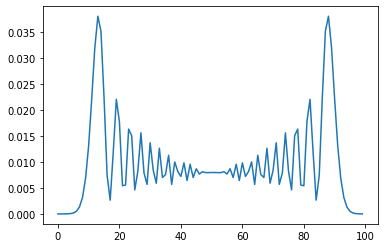

In [17]:
probDistVec = probDist.getProbVec()
plt.plot(probDistVec)

In [27]:
n = 100

graph = nx.cycle_graph(n)
qw = QWAK(graph)

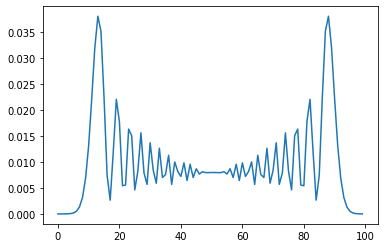

In [28]:
qw.runWalk(20, [50,51])

plt.plot(qw.getProbDistVec())